#Logistic Regression - MXNet (From Scratch)

In [1]:
from IPython.display import Image # this import is not important, its used for showing images in jupyter notebooks
import mxnet as mx
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

ctx = mx.gpu() if mx.context.num_gpus() > 0 else mx.cpu()
print('No of GPUs available on your system:', mx.context.num_gpus())
print('Chosen device as your ctx:', ctx)

No of GPUs available on your system: 1
Chosen device as your ctx: gpu(0)


In [2]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def function(x, num_examples = num_examples):
    linear = 2 * x[:, 0] - 0.1 * x[:, 1] + 2.4
    return nd.where(linear > 0, linear.ones_like(), linear.zeros_like())

# loc is location(mean), and scale is standard deviation
train_x = nd.random.normal(loc = 0, scale = 5, shape = (num_examples, num_inputs))
train_y = function(train_x)

test_x = nd.random.normal(loc = 0, scale = 5, shape = (1000, num_inputs))
test_y= function(test_x)

print('train_x.shape:', train_x.shape)
print('train_y.shape:', train_y.shape)

print('test_x.shape:', test_x.shape)
print('test_y.shape:', test_y.shape)

print('train_y.max().asscalar():', train_y.max().asscalar())
print('train_y.min().asscalar():', train_y.min().asscalar())

train_x.shape: (10000, 2)
train_y.shape: (10000,)
test_x.shape: (1000, 2)
test_y.shape: (1000,)
train_y.max().asscalar(): 1.0
train_y.min().asscalar(): 0.0


##Visualizing training dataset

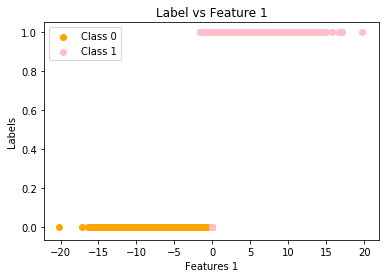

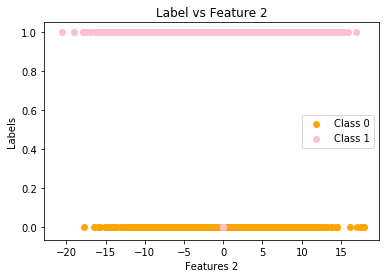

In [3]:
plt.scatter((train_x[:, 0] * (train_y == 0)).asnumpy(), (train_y * (train_y == 0)).asnumpy(), c = 'orange', label = 'Class 0')
plt.scatter((train_x[:, 0] * (train_y == 1)).asnumpy(), (train_y * (train_y == 1)).asnumpy(), c = 'pink', label = 'Class 1')
plt.title('Label vs Feature 1')
plt.xlabel('Features 1')
plt.ylabel('Labels')
plt.legend()
plt.show()

plt.scatter((train_x[:, 1] * (train_y == 0)).asnumpy(), (train_y * (train_y == 0)).asnumpy(), c = 'orange', label = 'Class 0')
plt.scatter((train_x[:, 1] * (train_y == 1)).asnumpy(), (train_y * (train_y == 1)).asnumpy(), c = 'pink', label = 'Class 1')
plt.title('Label vs Feature 2')
plt.xlabel('Features 2')
plt.ylabel('Labels')
plt.legend()
plt.show()

##Visualizing testing dataset

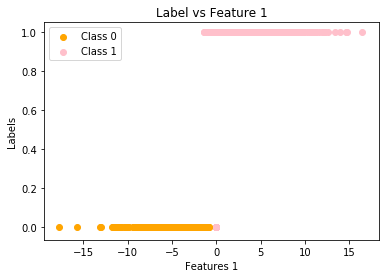

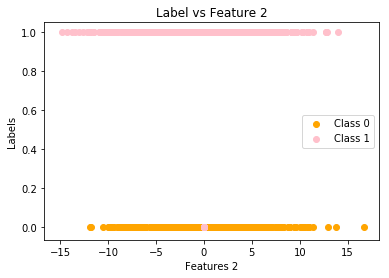

In [4]:
plt.scatter((test_x[:, 0] * (test_y == 0)).asnumpy(), (test_y * (test_y == 0)).asnumpy(), c = 'orange', label = 'Class 0')
plt.scatter((test_x[:, 0] * (test_y == 1)).asnumpy(), (test_y * (test_y == 1)).asnumpy(), c = 'pink', label = 'Class 1')
plt.title('Label vs Feature 1')
plt.xlabel('Features 1')
plt.ylabel('Labels')
plt.legend()
plt.show()

plt.scatter((test_x[:, 1] * (test_y == 0)).asnumpy(), (test_y * (test_y == 0)).asnumpy(), c = 'orange', label = 'Class 0')
plt.scatter((test_x[:, 1] * (test_y == 1)).asnumpy(), (test_y * (test_y == 1)).asnumpy(), c = 'pink', label = 'Class 1')
plt.title('Label vs Feature 2')
plt.xlabel('Features 2')
plt.ylabel('Labels')
plt.legend()
plt.show()

##Defining data iterator for training dataset

In [5]:
batch_size = 16
dataset = gluon.data.DataLoader(gluon.data.ArrayDataset(train_x, train_y), batch_size = batch_size, shuffle = True)

print('No of batches for batch size {} is {}'.format(batch_size, len(dataset)))

No of batches for batch size 16 is 625


##Building logistic regression model

Below we are initializing our model parameters for our model, and attaching gradient to them to convert them into differentiable parameters.(Note that we are initializing our parameters for context ctx, which we have initialized above)

##Logistic or Sigmoid function

In [0]:
def sigmoid(linear):
    return 1/(1 + nd.exp(-linear))

##Visualizing sigmoid function

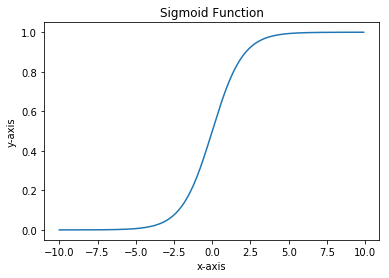

In [7]:
x = nd.arange(-10, 10, 0.1)
y = sigmoid(x)

plt.plot(x.asnumpy(), y.asnumpy())
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Sigmoid Function')
plt.show()

In [0]:
weight = nd.random.normal(shape = (num_inputs, num_outputs), ctx = ctx) * 0.01
bias = nd.random.normal(shape = num_outputs, ctx = ctx) * 0.01
params = [weight, bias]

for param in params:
    param.attach_grad()

def logisticregression(inputs):
    return sigmoid(nd.dot(inputs, weight) + bias)

##Defining our objective function

##Binary cross entropy

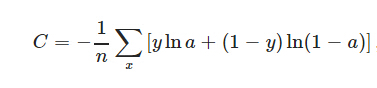

In [9]:
Image("http://i.imgur.com/Rjvy4vp.jpg")

In [0]:
def binarycrossentropy(predictions, labels):
    return -nd.mean((labels * nd.log(predictions)) +((1 - labels) * nd.log(1 - predictions)))

##Defining our parameters optimizer(Gradient Decent)

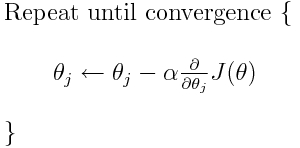

In [11]:
Image("https://www.codeproject.com/KB/recipes/879043/GradientDescent.jpg")

In [0]:
def sgd(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

##Training the  model

In [13]:
epochs = 20
num_batches = len(dataset)
learning_rate = .0001
losses = []

for epoch in range(epochs):
    cumulative_loss = 0
    for features, labels in dataset:
        features = features.as_in_context(ctx) # .as_in_context put features stored in cpu to ctx(which we have initialized above)
        labels = labels.as_in_context(ctx).reshape((-1, 1)) # .as_in_context put labels stored in cpu to ctx(which we have initialized above)
        with autograd.record():
            output = logisticregression(features)
            loss = binarycrossentropy(output, labels)
        loss.backward()
        sgd(params, learning_rate)
        cumulative_loss += loss

    print('Epoch: {} Loss: {}'.format(epoch, cumulative_loss.asscalar()/num_batches))
    losses.append(cumulative_loss.asscalar()/num_batches)

Epoch: 0 Loss: 0.61941044921875
Epoch: 1 Loss: 0.490379345703125
Epoch: 2 Loss: 0.420066943359375
Epoch: 3 Loss: 0.3760067138671875
Epoch: 4 Loss: 0.3455659912109375
Epoch: 5 Loss: 0.3230663330078125
Epoch: 6 Loss: 0.3056268798828125
Epoch: 7 Loss: 0.2916218994140625
Epoch: 8 Loss: 0.2800612548828125
Epoch: 9 Loss: 0.2703139404296875
Epoch: 10 Loss: 0.2619516357421875
Epoch: 11 Loss: 0.2546765625
Epoch: 12 Loss: 0.2482675048828125
Epoch: 13 Loss: 0.242564794921875
Epoch: 14 Loss: 0.237446142578125
Epoch: 15 Loss: 0.232815478515625
Epoch: 16 Loss: 0.2285983154296875
Epoch: 17 Loss: 0.2247368408203125
Epoch: 18 Loss: 0.22117978515625
Epoch: 19 Loss: 0.217888671875


In [0]:
def plot(losses, model = logisticregression, sample_size=100):
    xs = list(range(len(losses)))
    plt.plot(xs, losses, '-r')
    plt.title('Loss during training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    ####################################
    # Visualizing training predictions #
    ####################################
    plt.plot(train_x[:sample_size, 0].asnumpy(),
             model(train_x[:sample_size, :].as_in_context(ctx)).asnumpy(), 'or', label='Estimated')
    plt.plot(train_x[:sample_size, 0].asnumpy(),
             function(train_x[:sample_size, :]).asnumpy(), '*g', label='Real')
    plt.legend()
    plt.xlabel('First Features')
    plt.ylabel('Labels')
    plt.title('Prediction on training data as viewed from feature 1')
    plt.show()
    
    plt.plot(train_x[:sample_size, 1].asnumpy(),
             model(train_x[:sample_size, :].as_in_context(ctx)).asnumpy(), 'or', label='Estimated')
    plt.plot(train_x[:sample_size, 1].asnumpy(),
             function(train_x[:sample_size, :]).asnumpy(), '*g', label='Real')
    plt.legend()
    plt.xlabel('Second Features')
    plt.ylabel('Labels')
    plt.title('Prediction on training data as viewed from feature 2')
    plt.show()
    
    ####################################
    # Visualizing testing predictions #
    ####################################
    plt.plot(test_x[:sample_size, 0].asnumpy(),
             model(test_x[:sample_size, :].as_in_context(ctx)).asnumpy(), 'or', label='Estimated')
    plt.plot(test_x[:sample_size, 0].asnumpy(),
             function(test_x[:sample_size, :]).asnumpy(), '*g', label='Real')
    plt.legend()
    plt.xlabel('First Features')
    plt.ylabel('Labels')
    plt.title('Prediction on testing data as viewed from feature 1')
    plt.show()
    
    plt.plot(test_x[:sample_size, 1].asnumpy(),
             model(test_x[:sample_size, :].as_in_context(ctx)).asnumpy(), 'or', label='Estimated')
    plt.plot(test_x[:sample_size, 1].asnumpy(),
             function(test_x[:sample_size, :]).asnumpy(), '*g', label='Real')
    plt.legend()
    plt.xlabel('Second Features')
    plt.ylabel('Labels')
    plt.title('Prediction on testing data as viewed from feature 2')
    plt.show()

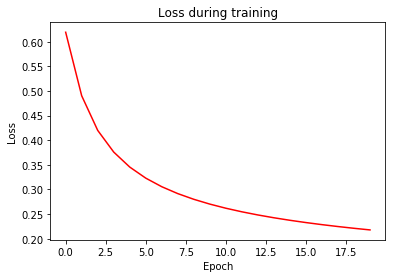

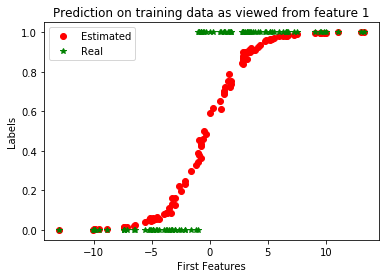

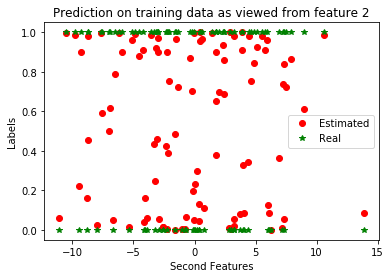

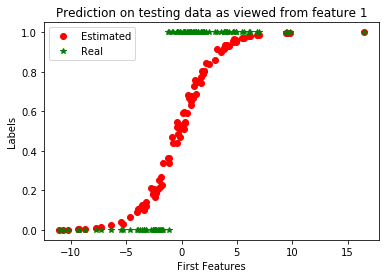

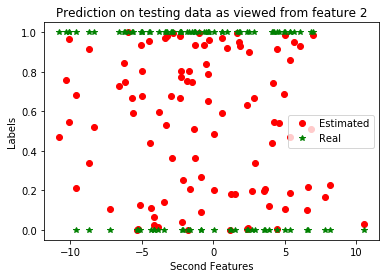

In [15]:
plot(losses)

##Lets look out our weight and bias value after training

In [16]:
print(f'Weight: {weight}')
print(f'Bias: {bias}')

Weight: 
[[ 0.61694986]
 [-0.02959069]]
<NDArray 2x1 @gpu(0)>
Bias: 
[0.10943359]
<NDArray 1 @gpu(0)>
